# **Aprendizaje por refuerzo**

## Contextual and Non-contextual Multiarmed Bandits

*Autores: Ignacio Cordova Pou, Bruno Muñoz Marcos y Daniel Beteta Francisco*

# **Multiarmed bandits para Credit Scoring**

El objetivo es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -10 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


A continuación se descarga y muestra:

In [ ]:
COLAB = True

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1000WA5q8DTZ68uoPaXddJ1TLJPBsIZpr&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=11SdrmYpGwW7xC6Nooe6aRBkORBnirrkm&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

**Información sobre cada variable:**

In [ ]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


**Base de datos:**

In [ ]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [ ]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

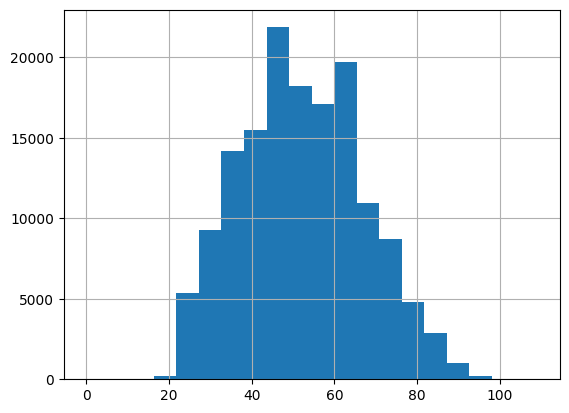

In [ ]:
df["age"].hist(bins=20);

In [ ]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
# limpieza básica:
#
# 1- Eliminamos filas con missing values (MonthlyIncome y NumberOfDependents)
# 2- Nos quedamos solo con personas de 18 a 70 años (incluidos)
# 3- Eliminamos filas que tengan 96 o 98 en columnas de retraso
#    (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,
#     NumberOfTimes90daysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Ahora dividimos el dataset en training y test:

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [ ]:
# frecuencia de impagos en training y test (en tanto por 1):
df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [ ]:
# Defino clase clientes:
class clientes:
    def __init__(self, df, penalizacion=-10): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
        self.penalizacion = penalizacion
        self.posibles_ganancias = {"0":0, # accion ideal 0, ganancia posible 0
                                   "1":1} # accion ideal 1, ganancia posible 1
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
          if self.penalizacion == 'disminuye':
            return -10*np.exp(-0.001*self.i) # va disminuyendo la penalización
          return self.penalizacion
        return 1 # paga

    def tipo_cliente(self):
      return ["Nopaga" if self.df.iloc[self.i]["SeriousDlqin2yrs"] else "Paga"]

    def posibles_ganancias(self):
      return self.posibles_ganancias


In [ ]:
# clientes: una clase
# cl_train: una instancia de esa clase
# cl_test: otra instancia de esa clase
#
# podemos ver cl_train como una "caja" donde hemos
# metido el dataset de entrenamiento y va a haber
# métodos que me permiten interaccionar con él
#
# Lo mismo con cl_test, pero para los datos de test

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [ ]:
cl_train.cliente() # simulo que llega un cliente nuevo

In [ ]:
cl_train.tipo_cliente()

['Paga']

In [ ]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [ ]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [ ]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [ ]:
cl_train.get_reward(1)

1

# **Tareas a realizar**

### **Tarea 1:** Calcula la evolución del reward total y regret total en training de:
 a) un algoritmo aleatorio
 b) un algoritmo que siempre da el crédito
 c) un algoritmo que nunca da el crédito

Calcula en otra gráfica la evolución de su reward promedio y regret promedio. ¿Tienen sentido los resultados?

In [ ]:
import random

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def experiment(df, strategy='random'):
  """
  Simulate a loan granting system with a given
  strategy and calculate total reward and regret.

  Input:

  df (pd.DataFrame): A pandas DataFrame
  containing client information.
  strategy (str): The strategy to be used. If
  'random' (default), it randomly decides whether
  to grant a loan or not.

  Returns:

  None: Displays four plots visualizing the total
  reward, average reward, total regret, and average regret.
  """
  cl  = clientes(df)
  r_total = 0
  regret_total = 0
  historico_r_total         = []
  historico_r_promedio      = []
  historico_regret_total    = []
  historico_regret_promedio = []

  # Iterate over rows in df
  for _, row in df.iterrows():
      # Get a new client
      cl.cliente()

      if strategy=='random':
          action = np.random.randint(0,2) # random action
      else:
          action = strategy

      reward = cl.get_reward(action)

      r_total += reward

      historico_r_total.append(r_total)
      historico_r_promedio.append(r_total/len(historico_r_total))

      # Regret computation
      if (action) & (reward==-10): # concedemos y no paga, regret 10
          regret_total += -reward
      if (not action) & (row["SeriousDlqin2yrs"] == 0): # no concedemos pero hubiese pagado, regret 1
          regret_total += 1

      historico_regret_total.append(regret_total)
      historico_regret_promedio.append(regret_total/len(historico_regret_total))

  # Create a figure and a 2x2 subplot grid
  fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True)

  # Plot the data in each subplot
  ax[0, 0].plot(historico_r_total, linewidth=0.8)
  ax[0, 0].set_title('Total reward')
  ax[0, 1].plot(historico_r_promedio)
  ax[0, 1].set_title('Average reward')
  ax[1, 0].plot(historico_regret_total)
  ax[1, 0].set_title('Total regret')
  ax[1, 1].plot(historico_regret_promedio)
  ax[1, 1].set_title('Average regret')
  # Show the plot
  plt.show()

  print('Reward promedio final:', np.round(historico_r_promedio[-1],3))
  print('Regret promedio final:',  np.round(historico_regret_promedio[-1],3))

Usaremos el valor aproximado de la probabilidad de impago para calcular un valor aproximado de los valores esperados:

In [ ]:
print('Approximate P(Impago)=', np.round(df["SeriousDlqin2yrs"].mean(), 5))

Approximate P(Impago)= 0.07373


#### a) Algoritmo aleatorio

En este caso el average reward será aproximadamente:

$$
𝔼[r] = 0.5 * [0] +  0.5 [P(Impago) * (-10) + (1 - P(Impago)) * 1] \\ ≈ 0 + 0.5[ 0.07373*(-10) + (1-0.07373) ] \\ = 0.094
$$

Por otro lado, el coste de oportunida perdida medio en un paso es:

$$
l_t = 𝔼[V^* - Q(a_t)] \\ = 0.5 [ P(impago)* 0 + P(pago) * 1] + 0.5 [ P(impago)* 10 + P(pago) * 0] \\ ≈ 0.5 [(1-0.07373)*1] + 0.5 [ 0.07373*10 ] \\ = 0.83
$$






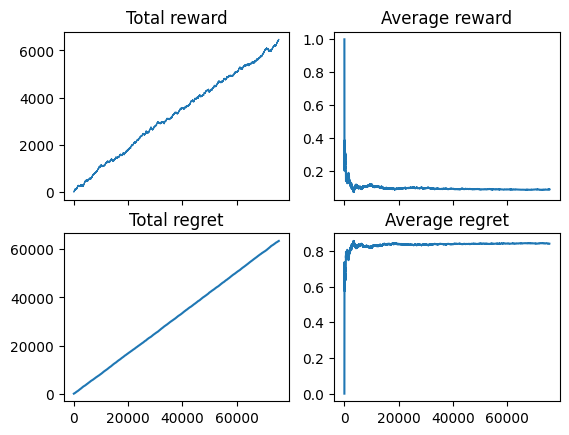

Reward promedio final: 0.086
Regret promedio final: 0.841


In [ ]:
experiment(df_train, strategy='random')

b) Algortimo que siempre da crédito

En este caso el valor esperado del reward será:

$$
𝔼[r] = P(Impago) * (-10) + (1 - P(Impago)) * 1 \\ ≈ 0.07373*(-10) + (1-0.07373) \\ = 0.189
$$

Y el coste de oportunidad perdida medio será:

$$
l_t = 𝔼[V^* - Q(a_t)] \\ = [ P(impago)* 10 + P(pago) * 0] \\ ≈  0.7373
$$


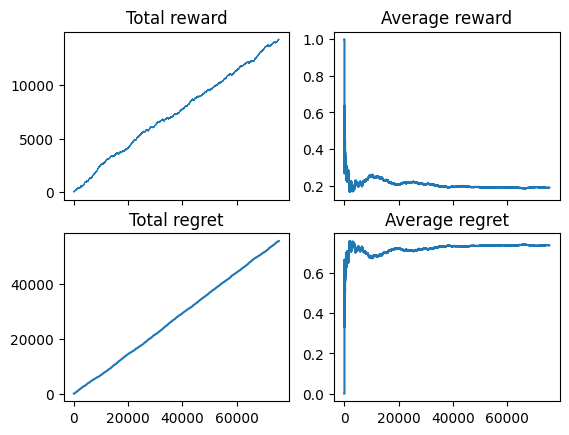

Reward promedio final: 0.189
Regret promedio final: 0.737


In [ ]:
experiment(df_train, strategy=1)

c) Algoritmo que nunca da crédito

En este caso el valor esperado del reward será 0 ya que nunca se da crédito.

Y el coste de oportunidad perdida medio será:

$$
l_t = 𝔼[V^* - Q(a_t)] \\ = [ P(impago)* 0 + P(pago) * 1] \\ ≈  0.926
$$

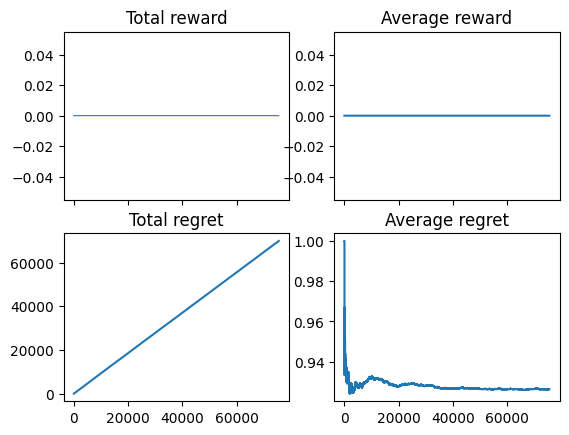

Reward promedio final: 0.0
Regret promedio final: 0.926


In [ ]:
experiment(df_train, strategy=0)

Como se puede observar las estimaciones experimentales coinciden con el resultado esperado teórico. Por tanto, se concluye que los resultados tienen sentido.

### **Tarea 2:** Entrena un multiarmed bandit **no contextual** en training. Calcula las mismas métricas que en el punto 1. ¿Cuál es la estrategia que aprende el modelo?

Vamos a entrenar un DecayingEpsilonGreedy para que aprenda la mejor estreategia usando los datos de df_train. Hay tres estrategias para elegir:

0. No dar crédito nunca
1. Dar crédito siempre
2. Elegir aleatoriamente si dar crédito o no

Esperamos que el agente aprenda que la mejor estrategia es "1. Dar crédito siempre".

In [ ]:
def epsilon_dinamico(t, k):
    return min(1, k/t)

In [ ]:
class DecayingEpsilonGreedy():
  def __init__(self, k):
    self.k = k
    self.t = 1
    self.nveces = [0, # no dar crédito siempre
                   0, # dar crédito nunca
                   0, # elegir aleatoriamente
                    ]
    self.suma_rs = [0, 0, 0] # premios totales acumulados en cada estrategia
    self.Qs = [-10, -10, -10]
    self.epsilons = [] # histórico de epsilons calculados

  # Implementación de la estrategia de decisión:
  def choose_action(self):
    self.epsilon = epsilon_dinamico(self.t, self.k)
    if np.random.rand() < self.epsilon: # exploramos?
      return random.randint(0, 3) # CAMBIAR!!!!
    return np.argmax(self.Qs)

  def update(self, action, r): # con esta función el agente "aprende"
    self.nveces[action] += 1 # sumamos 1 al número de veces que se ha realizado la acción "action"
    self.suma_rs[action] += r # sumamos r a la recompensa total asociada a esa acción
    self.Qs[action] = self.suma_rs[action] / self.nveces[action] # recalculamos la Q
    self.t += 1 # aumentamos el tiempo a 1
    self.epsilons.append(self.epsilon) # histórico de epsilons calculados

In [ ]:
def experimento(agente, clientes, N):
  r_total = 0
  regret_total = 0
  historico_r_total    = []
  historico_r_promedio = []
  historico_regret     = []

  for i in range(N):
      clientes.cliente() # llega un cliente
      action = agente.choose_action() # pregunto al agente qué acción quiere realizar
      if action==2: # if random strategy is chosen
        random_action=np.random.randint(0,2)
        reward = clientes.get_reward(random_action) # obtengo el refuerzo
      else:
        reward = clientes.get_reward(action)
      agente.update(action, reward) # el agente aprende con la acción elegida y el reward obtenido

      r_total += reward
      historico_r_total.append(r_total)
      historico_r_promedio.append(r_total/(i+1)) # i+1: número de clientes

      # Regret computation
      if (action) & (reward==-10): # concedemos y no paga, regret 10
          regret_total += -reward
      if (not action) & (clientes.tipo_cliente()[0]=='Paga'): # no concedemos pero hubiese pagado, regret 1
          regret_total += 1

      historico_regret.append(regret_total)

  # nos dibujamos alguna gráfica:

  # Create a figure and a 2x2 subplot grid
  fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True,
                         figsize=(10,4), tight_layout=True)
  # Plot the data in each subplot
  ax[0].plot(historico_r_total, linewidth=0.8)
  ax[0].set_title('Total reward')
  ax[1].plot(historico_r_promedio)
  ax[1].set_title('Average reward')
  ax[2].plot(historico_regret)
  ax[2].set_title('Total regret')
  # Show the plot
  plt.show()
  print("Refuerzo total promedio final:", np.round(historico_r_promedio[-1],4))

  print("Qs finales:", np.round(agente.Qs,4))

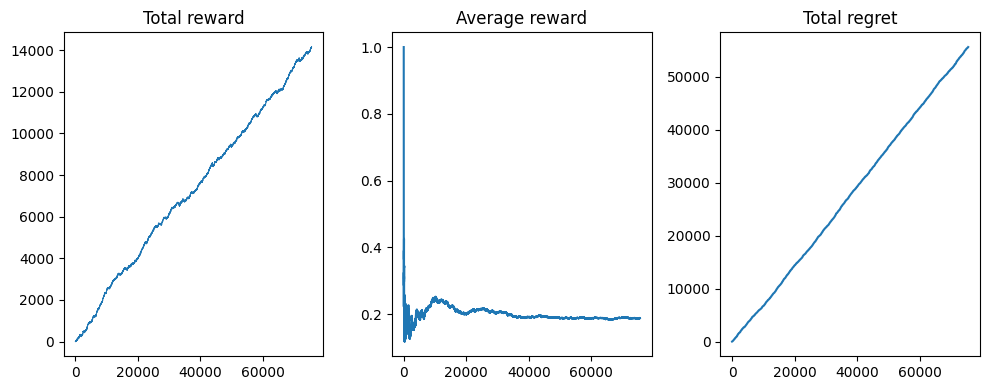

Refuerzo total promedio final: 0.1873
Qs finales: [0.     0.1883 0.1011]


In [ ]:
# Defino entorno y agente desde 0, y simulo aprendizaje:
agente = DecayingEpsilonGreedy(k=100)
experimento(agente, clientes(df_train), N = len(df_train))

Hemos entrenado un DecayingEpsilonGreedy usando los datos de df_train. El agente ha obtenido aproximadamente los siguientes valores de acción:

$$
\begin{align*}
Q(a) &= [ \ 0.0, \ \quad \text{a = no dar crédito nunca} \\
&\quad 0.1876, \quad \text{a= dar crédito siempre} \\
&\quad 0.0973, \quad \text{a= elegir dar o no aleatoramiente} \ ] \
\end{align*}
$$

Los resultados de este agente coinciden con la evaluación que hemos hecho en el apartado anterior, luego como esperábamos elige la estrategia es "1. Dar crédito siempre".

### **Tarea 3:** Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en los puntos anteriores.

In [ ]:
def show_records(records):
    cumm_ideal_rew_plt = np.cumsum(records["ideal_reward_record"])
    cummulative_reward_plt = np.cumsum(records["reward_record"]) # / aux

    ts = records['timesteps']
    plt.plot(ts, cummulative_reward_plt, label='cummulative reward')
    plt.plot(ts, cumm_ideal_rew_plt, label='maximum reward')
    plt.plot(ts, cumm_ideal_rew_plt - cummulative_reward_plt,
             color='red', label='cummulative regret')
    plt.plot([ts[0],ts[-1]], [0,0], ':k')
    plt.title('Cummulative Reward & Regret')
    plt.legend()
    plt.show()
    print("Total reward      :", cummulative_reward_plt[-1])
    print("Total ideal reward:", cumm_ideal_rew_plt[-1])


def show_records_avgs(records):
    # después de hacer el cumsum paso a float porque si no al dividir
    # posteriormente por (i+1) no convierte el array a float sino que
    # se queda en entero
    avg_reward_plt = np.cumsum(records["reward_record"]).astype(float)
    avg_ideal_rew_plt = np.cumsum(records["ideal_reward_record"]).astype(float)

    for i in range(len(avg_reward_plt)):
        avg_reward_plt[i] /= (i+1)
        avg_ideal_rew_plt[i] /= (i+1)

    ts = records['timesteps']
    plt.plot(ts, avg_reward_plt, label='average reward por cliente')
    plt.plot(ts, avg_ideal_rew_plt, label='maximum reward por cliente')
    plt.plot(ts, records['avg_regret_record'],
             color='red', label='mean regret')
    plt.title('Average Reward & Regret')
    plt.legend()
    print("Average reward      :", avg_reward_plt[-1])
    print("Average ideal reward:", avg_ideal_rew_plt[-1])


In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd

    gdd.download_file_from_google_drive(file_id='1fCnGzS5U_x-k_03op_XJkHVS4jpvjSxS',
                                        dest_path='./spacebandits.zip', unzip=True)

Unzipping...Done.


In [ ]:
from space_bandits import LinearBandits

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
def iterate_model(clientes,modelo, acciones_ideales, steps, records=None,
                  plot_frequency=250, avg_length=150,
                  random_state=None):
    """Goes through online learning simulation with model."""

    if random_state is not None:
        np.random.seed(random_state)

    #these will track values for plotting
    if records is None:
        records = dict()
        records['timesteps'] = []
        records['reward_record'] = []
        records['ideal_reward_record'] = []
        records['regret_record'] = []
        records['avg_regret_record'] = []
        start = 0
    else:
        start = records['timesteps'][-1] + 1
    for i in range(start, start+steps):
        records['timesteps'].append(i)

        clientes.cliente() # <- cliente que llega

        contexto = clientes.get_context().values # datos del cliente a los que se tiene acceso

        accion = modelo.action(contexto) # acción recomendada por el modelo

        # se lanza la acción sobre el cliente y eso produce una ganancia (reward)
        reward = clientes.get_reward(accion) # <- ganancia (reward) obtenida tras lanzar la acción

        modelo.update(contexto, accion, reward) # actualización del modelo
        records['reward_record'].append(reward)


        # acción ideal: es aquella que se debería seleccionar
        # si conociéramos el tipo de cliente y el comportamiento
        # de ese cliente para cada credito.
        # ** El agente desconoce todas esas cosas **cliente
        accion_ideal        = acciones_ideales[clientes.tipo_cliente()[0]]
        reward_accion_ideal = clientes.posibles_ganancias[str(accion_ideal)]
        # reward_ideal_choice = max(c.posibles_ganancias)
        records['ideal_reward_record'].append(reward_accion_ideal)

        #regret is the opportunity cost of not choosing the optimal promotion
        regret = reward_accion_ideal - reward
        records['regret_record'].append(regret)


        #plot occasionally
        if i <= avg_length:
            if i < avg_length:
                moving_avg=0
            else:
                moving_avg = np.array(records['regret_record']).mean()
            if i == avg_length:
                records['avg_regret_record'] = [moving_avg]*avg_length
        else:
            moving_avg = sum(records['regret_record'][-avg_length:])/avg_length
        records['avg_regret_record'].append(moving_avg)
        if (i+1) % plot_frequency == 0 and i > 0:
            show_records(records)
            plt.show()
    return records

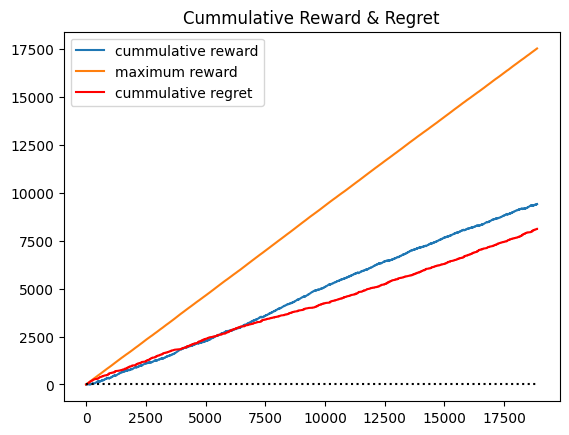

Total reward      : 9403
Total ideal reward: 17518


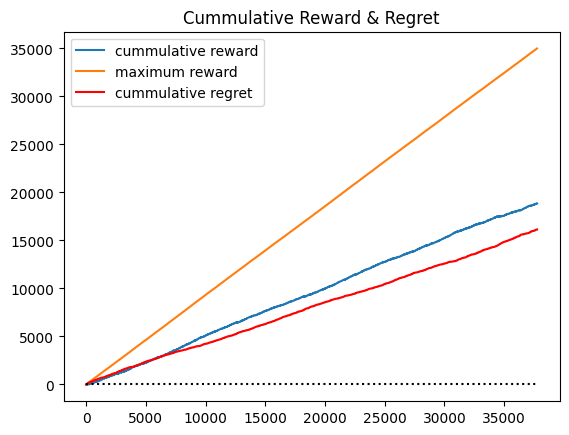

Total reward      : 18843
Total ideal reward: 34988


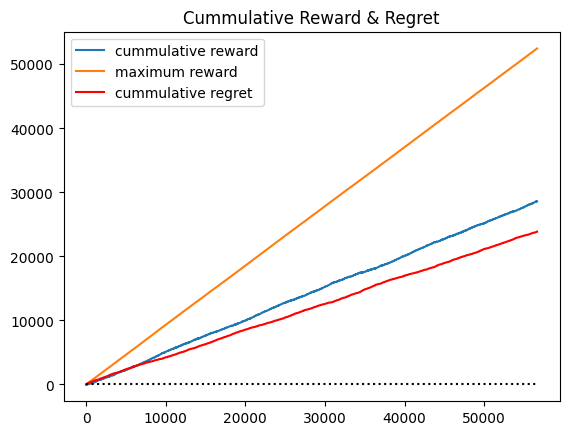

Total reward      : 28601
Total ideal reward: 52474


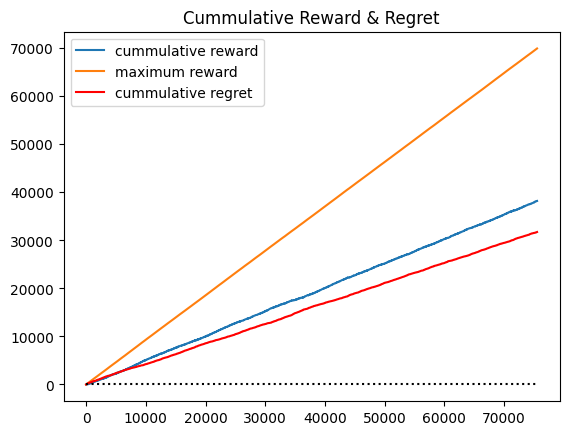

Total reward      : 38206
Total ideal reward: 69948


In [ ]:
n_acciones = 2
n_features = df_train.columns.notna().sum()-1

modelo_lineal = LinearBandits(n_acciones, n_features,
                              initial_pulls=100)

acciones_ideales = {
    "Paga": 1, # para el tipo de cliente "paga" lo óptimo es darle el crédito (1)
    "Nopaga": 0  # para el tipo de cliente "no paga" lo óptimo es no darle el crédito (0)
}

records = iterate_model(clientes(df_train),modelo_lineal, acciones_ideales,
                        steps=len(df_train), plot_frequency=len(df_train)//4)

Debido al alto coste coste computacional, guardamos el modelo mediante pickle para evitar tener que volver a generarlo cada vez que se ejecute el notebook.

In [ ]:
import pickle

def load_model(path):
    """loads model from path argument"""
    with open(path, 'rb') as f:
        model = pickle.load(f)
    return model

modelo_lineal.save('trained_modelo_lineal.pkl')
modelo_lineal = load_model('trained_modelo_lineal.pkl')

Average reward      : 0.5059323604968352
Average ideal reward: 0.9262692338250483


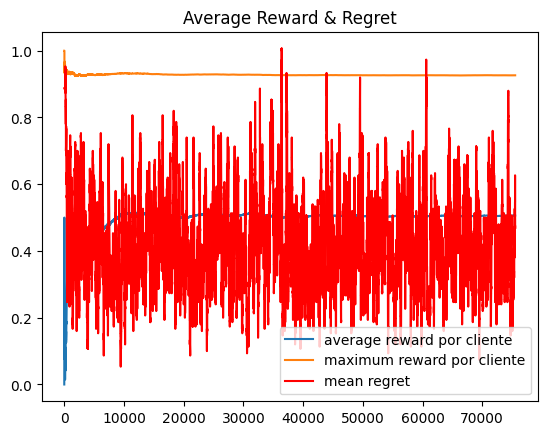

In [ ]:
show_records_avgs(records)

En conclusión, hemos comprobado que utilizando el contexto además de la acción eligida para maximizar la recompensa funciona, ya que se ha pasado de un "average reward" de 0.18 a un 0.50, lo cual, es una diferencia significativa.

### **Tarea 4:** Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción. Chequea si obtienes los mismos valores calculándolos tú. Chequea si la acción elegida por el modelo es la de mayor Q.

In [ ]:
cl_train = clientes(df_train)

In [ ]:
N = 3

for client in range(N):
  cl_train.cliente()
  ev = modelo_lineal.expected_values(cl_train.get_context().values)

  print(ev)

[0.         0.81342393]
[0.         0.48635516]
[0.       0.762787]


In [ ]:
auxs = []
features = ['RevolvingUtilizationOfUnsecuredLines', 'age',
            'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
            'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes_90daysLate',
            'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
            'NumberOfDependents']
mas = []
for a in range(n_acciones):
  aux = "Q_estimada(accion={}) = {:.2f}{}{:.2f}·RUUL{}{:.2f}·age{}{:.2f}·_30d59d{}{:.2f}·DR{}{:.2f}·MI{}{:.2f}·NOCLL{}{:.2f}·_90d{}{:.2f}·RELL{}{:.2f}·_60d89d{}{:.2f}·ND"
  pars = modelo_lineal.mu[a]
  for idx,feature in enumerate(features):
    mas.append(' + ' if pars[idx]>=0 else ' ')
  aux2 = aux.format(a,
                      modelo_lineal.mu[a][10], mas[0],
                      modelo_lineal.mu[a][0], mas[1],
                      modelo_lineal.mu[a][1], mas[2],
                      modelo_lineal.mu[a][2], mas[3],
                      modelo_lineal.mu[a][3], mas[4],
                      modelo_lineal.mu[a][4], mas[5],
                      modelo_lineal.mu[a][5], mas[6],
                      modelo_lineal.mu[a][6], mas[7],
                      modelo_lineal.mu[a][7], mas[8],
                      modelo_lineal.mu[a][8], mas[9],
                      modelo_lineal.mu[a][9])
  print(aux2)
  aux2 = aux2.replace("RUUL","{:.2f}")
  aux2 = aux2.replace("age","{:.2f}")
  aux2 = aux2.replace("_30d59d","{:.2f}")
  aux2 = aux2.replace("DR","{:.2f}")
  aux2 = aux2.replace("MI","{:.2f}")
  aux2 = aux2.replace("NOCLL","{:.2f}")
  aux2 = aux2.replace("_90d","{:.2f}")
  aux2 = aux2.replace("RELL","{:.2f}")
  aux2 = aux2.replace("_60d89d","{:.2f}")
  aux2 = aux2.replace("ND","{:.2f}")

  auxs.append(aux2)


Q_estimada(accion=0) = 0.00 + 0.00·RUUL + 0.00·age + 0.00·_30d59d + 0.00·DR + 0.00·MI + 0.00·NOCLL + 0.00·_90d + 0.00·RELL + 0.00·_60d89d + 0.00·ND
Q_estimada(accion=1) = 0.20 + 0.00·RUUL + 0.01·age + -0.59·_30d59d + 0.00·DR + 0.00·MI + -0.01·NOCLL + -1.09·_90d + -0.04·RELL + -1.24·_60d89d + -0.01·ND


In [ ]:
cl_train = clientes(df_train)

In [ ]:
cl_train.cliente()
contexto = cl_train.get_context().values

aux = "Contexto cliente (RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND) = ({:.2f},{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f})\n"
print(aux.format(contexto[0], contexto[1], contexto[2], contexto[3], contexto[4], contexto[5], contexto[6], contexto[7], contexto[7], contexto[8], contexto[9]))
print("Qs estimadas por el modelo (método expected values):")
Qs = modelo_lineal.expected_values(contexto)
for a in range(n_acciones):
    print("  * Q_estimada(acción={}) = {}".format(a,Qs[a].round(3)))
print()
RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND = contexto
print("Qs estimadas a mano con los coeficientes del modelo:")
alphas = modelo_lineal.mu
for a in range(n_acciones):
    Q = alphas[a][10] + alphas[a][0]*RUUL + alphas[a][1]*age \
    +alphas[a][2]*_30d59d + alphas[a][3]*DR + alphas[a][4]*MI \
    +alphas[a][5]*NOCLL + alphas[a][6]*_90d + alphas[a][7]*RELL \
    +alphas[a][8]*_60d89d + alphas[a][9]*ND


    print("  * "+auxs[a].format(RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND)+" = "+str(Q.round(3)))

print()
print("Acción elegida por el modelo:", modelo_lineal.predict(contexto, thompson=False))

Contexto cliente (RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND) = (0.06,59.00,,0.00,,0.16,,16666.00,,5.00,,0.00,,1.00,,1.00,,0.00)

Qs estimadas por el modelo (método expected values):
  * Q_estimada(acción=0) = 0.0
  * Q_estimada(acción=1) = 0.813

Qs estimadas a mano con los coeficientes del modelo:
  * Q_estimada(accion=0) = 0.00 + 0.00·0.06 + 0.00·59.00 + 0.00·0.00 + 0.00·0.16 + 0.00·16666.00 + 0.00·5.00 + 0.00·0.00 + 0.00·1.00 + 0.00·0.00 + 0.00·2.00 = 0.0
  * Q_estimada(accion=1) = 0.20 + 0.00·0.06 + 0.01·59.00 + -0.59·0.00 + 0.00·0.16 + 0.00·16666.00 + -0.01·5.00 + -1.09·0.00 + -0.04·1.00 + -1.24·0.00 + -0.01·2.00 = 0.813

Acción elegida por el modelo: 1


In [ ]:
cl_train.cliente()
contexto = cl_train.get_context().values

aux = "Contexto cliente (RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND) = ({:.2f},{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f})\n"
print(aux.format(contexto[0], contexto[1], contexto[2], contexto[3], contexto[4], contexto[5], contexto[6], contexto[7], contexto[7], contexto[8], contexto[9]))
print("Qs estimadas por el modelo (método expected values):")
Qs = modelo_lineal.expected_values(contexto)
for a in range(n_acciones):
    print("  * Q_estimada(acción={}) = {}".format(a,Qs[a].round(3)))
print()
RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND = contexto
print("Qs estimadas a mano con los coeficientes del modelo:")
alphas = modelo_lineal.mu
for a in range(n_acciones):
    Q = alphas[a][10] + alphas[a][0]*RUUL + alphas[a][1]*age \
    +alphas[a][2]*_30d59d + alphas[a][3]*DR + alphas[a][4]*MI \
    +alphas[a][5]*NOCLL + alphas[a][6]*_90d + alphas[a][7]*RELL \
    +alphas[a][8]*_60d89d + alphas[a][9]*ND


    print("  * "+auxs[a].format(RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND)+" = "+str(Q.round(3)))

print()
print("Acción elegida por el modelo:", modelo_lineal.predict(contexto, thompson=False))

Contexto cliente (RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND) = (0.21,30.00,,0.00,,0.13,,2400.00,,7.00,,0.00,,0.00,,0.00,,0.00)

Qs estimadas por el modelo (método expected values):
  * Q_estimada(acción=0) = 0.0
  * Q_estimada(acción=1) = 0.486

Qs estimadas a mano con los coeficientes del modelo:
  * Q_estimada(accion=0) = 0.00 + 0.00·0.21 + 0.00·30.00 + 0.00·0.00 + 0.00·0.13 + 0.00·2400.00 + 0.00·7.00 + 0.00·0.00 + 0.00·0.00 + 0.00·0.00 + 0.00·0.00 = 0.0
  * Q_estimada(accion=1) = 0.20 + 0.00·0.21 + 0.01·30.00 + -0.59·0.00 + 0.00·0.13 + 0.00·2400.00 + -0.01·7.00 + -1.09·0.00 + -0.04·0.00 + -1.24·0.00 + -0.01·0.00 = 0.486

Acción elegida por el modelo: 1


In [ ]:
cl_train.cliente()
contexto = cl_train.get_context().values

aux = "Contexto cliente (RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND) = ({:.2f},{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f},,{:.2f})\n"
print(aux.format(contexto[0], contexto[1], contexto[2], contexto[3], contexto[4], contexto[5], contexto[6], contexto[7], contexto[7], contexto[8], contexto[9]))
print("Qs estimadas por el modelo (método expected values):")
Qs = modelo_lineal.expected_values(contexto)
for a in range(n_acciones):
    print("  * Q_estimada(acción={}) = {}".format(a,Qs[a].round(3)))
print()
RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND = contexto
print("Qs estimadas a mano con los coeficientes del modelo:")
alphas = modelo_lineal.mu
for a in range(n_acciones):
    Q = alphas[a][10] + alphas[a][0]*RUUL + alphas[a][1]*age \
    +alphas[a][2]*_30d59d + alphas[a][3]*DR + alphas[a][4]*MI \
    +alphas[a][5]*NOCLL + alphas[a][6]*_90d + alphas[a][7]*RELL \
    +alphas[a][8]*_60d89d + alphas[a][9]*ND


    print("  * "+auxs[a].format(RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND)+" = "+str(Q.round(3)))

print()
print("Acción elegida por el modelo:", modelo_lineal.predict(contexto, thompson=False))

Contexto cliente (RUUL,age,_30d59d,DR,MI,NOCLL,_90d,RELL,_60d89d,ND) = (0.41,58.00,,0.00,,0.15,,22000.00,,11.00,,0.00,,1.00,,1.00,,0.00)

Qs estimadas por el modelo (método expected values):
  * Q_estimada(acción=0) = 0.0
  * Q_estimada(acción=1) = 0.763

Qs estimadas a mano con los coeficientes del modelo:
  * Q_estimada(accion=0) = 0.00 + 0.00·0.41 + 0.00·58.00 + 0.00·0.00 + 0.00·0.15 + 0.00·22000.00 + 0.00·11.00 + 0.00·0.00 + 0.00·1.00 + 0.00·0.00 + 0.00·0.00 = 0.0
  * Q_estimada(accion=1) = 0.20 + 0.00·0.41 + 0.01·58.00 + -0.59·0.00 + 0.00·0.15 + 0.00·22000.00 + -0.01·11.00 + -1.09·0.00 + -0.04·1.00 + -1.24·0.00 + -0.01·0.00 = 0.763

Acción elegida por el modelo: 1


Por un lado, hemos podido comprobar que las Qs estimadas calculadas a mano coinciden con las Qs calculadas por el modelo utilizando la funcion expected_values().

Por otro lado, el modelo escoge la acción con mayor Q estimada.

Pero vamos a ver si es realmente la acción óptima:

In [ ]:
cl_train = clientes(df_train)

N = 3

for client in range(N):
  cl_train.cliente()
  tipo = cl_train.tipo_cliente()
  ev = modelo_lineal.expected_values(cl_train.get_context().values)

  print(ev, tipo)

[0.         0.81342393] ['Paga']
[0.         0.48635516] ['Paga']
[0.       0.762787] ['Paga']


Vemos que en estos tres casos, el modelo escoge que la acción óptima es dar el crédito. Y efectivamente así es, la acción óptima era dar el crédito.

Por último, vamos a ver algunos expected_values para clientes que no pagan:

In [ ]:
cl_train = clientes(df_train)

N = 300
print('Expected values para clientes que NO PAGAN')

for client in range(N):
  cl_train.cliente()
  if cl_train.tipo_cliente()[0] == 'Nopaga':
    ev = modelo_lineal.expected_values(cl_train.get_context().values)
    print(ev)

Expected values para clientes que NO PAGAN
[0.         0.39463755]
[ 0.         -5.18275009]
[0.         0.64964462]
[ 0.         -1.07558974]
[0.         0.57185466]
[0.         0.06466102]
[0.         0.50774211]
[0.        0.4764233]
[ 0.         -0.34990525]
[ 0.         -3.77730954]
[ 0.         -1.46861735]
[ 0.         -7.94424161]
[0.         0.62670749]
[ 0.         -4.54930859]
[ 0.         -3.93357012]
[ 0.         -0.81608993]
[0.         0.46681877]


Vemos que en muchos casos el agente consigue asociar un Q negativa a dar el crédito, y cuando no lo consigue, el valor de Q es muy cercano a "0" (caso dudoso).

### **Tarea 5:** Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).

In [ ]:
df_test, df_control = train_test_split(df_test, random_state=1, test_size=0.1, stratify=df_test["SeriousDlqin2yrs"])

In [ ]:
def evaluate_model(clientes, modelo, acciones_ideales, steps, records=None,
                  plot_frequency=250, avg_length=150,
                  random_state=None):
    """Goes through data and evaluates model"""

    if random_state is not None:
        np.random.seed(random_state)

    #these will track values for plotting
    if records is None:
        records = dict()
        records['timesteps'] = []
        records['reward_record'] = []
        records['ideal_reward_record'] = []
        records['regret_record'] = []
        records['avg_regret_record'] = []
        start = 0
    else:
        start = records['timesteps'][-1] + 1
    for i in range(start, start+steps):
        records['timesteps'].append(i)

        clientes.cliente() # <- cliente que llega

        contexto = clientes.get_context().values # datos del cliente a los que se tiene acceso

        accion = modelo.action(contexto) # acción recomendada por el modelo

        # se lanza la acción sobre el cliente y eso produce una ganancia (reward)
        reward = clientes.get_reward(accion) # <- ganancia (reward) obtenida tras lanzar la acción

        # en evaluacion el modelo NO aprende
        #modelo.update(contexto, accion, reward) # actualización del modelo
        records['reward_record'].append(reward)


        # acción ideal: es aquella que se debería seleccionar
        # si conociéramos el tipo de cliente y el comportamiento
        # de ese cliente para cada promo.
        # ** El agente desconoce todas esas cosas **cliente
        accion_ideal        = acciones_ideales[clientes.tipo_cliente()[0]]
        reward_accion_ideal = clientes.posibles_ganancias[str(accion_ideal)]
        # reward_ideal_choice = max(c.posibles_ganancias)
        records['ideal_reward_record'].append(reward_accion_ideal)

        # regret is the opportunity cost of not choosing the optimal promotion
        regret = reward_accion_ideal - reward
        records['regret_record'].append(regret)


        # plot occasionally
        if i <= avg_length:
            if i < avg_length:
                moving_avg=0
            else:
                moving_avg = np.array(records['regret_record']).mean()
            if i == avg_length:
                records['avg_regret_record'] = [moving_avg]*avg_length
        else:
            moving_avg = sum(records['regret_record'][-avg_length:])/avg_length
        records['avg_regret_record'].append(moving_avg)
        if (i+1) % plot_frequency == 0 and i > 0:
            show_records(records)
            plt.show()
    return records

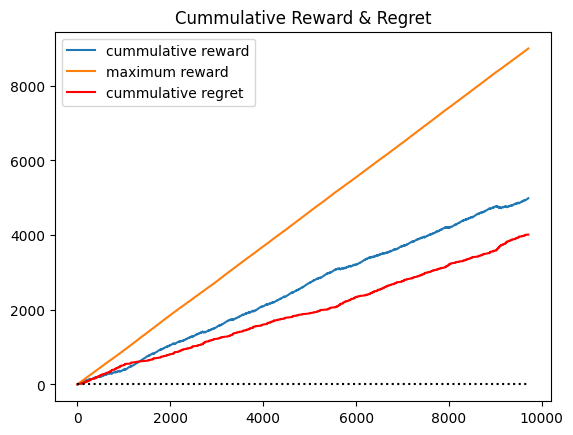

Total reward      : 4986
Total ideal reward: 8999


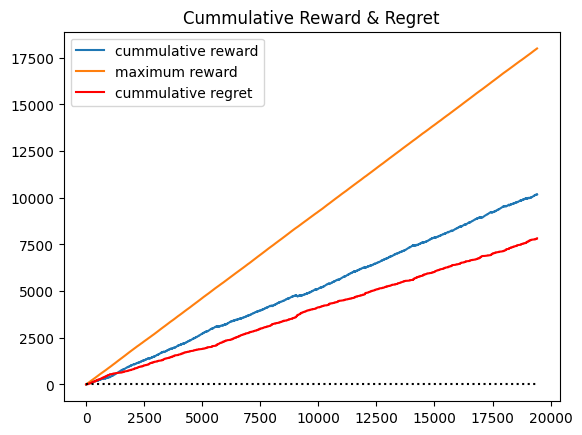

Total reward      : 10170
Total ideal reward: 17997


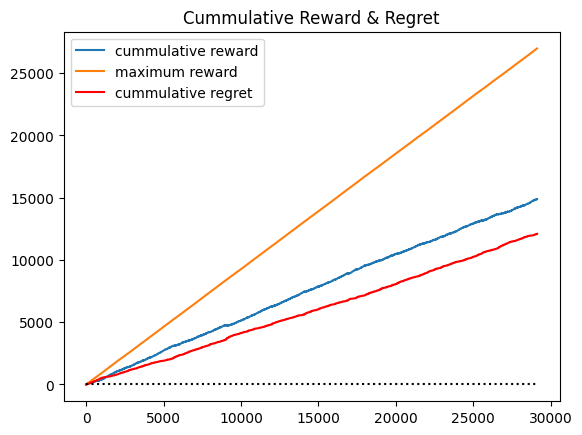

Total reward      : 14880
Total ideal reward: 26981


In [ ]:
modelo_lineal = load_model('trained_modelo_lineal.pkl')

records = evaluate_model(clientes(df_test),modelo_lineal, acciones_ideales,
                        steps=len(df_test), plot_frequency=len(df_test)//3)

Average reward      : 0.5108486679483658
Average ideal reward: 0.9262908541609448


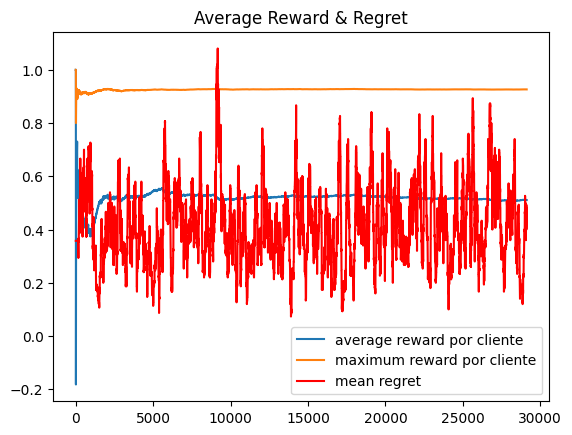

In [ ]:
show_records_avgs(records)

Comparamos con el grupo de control:

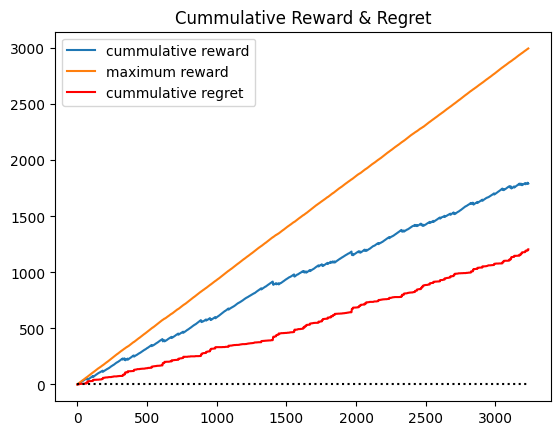

Total reward      : 1792
Total ideal reward: 2998


In [ ]:
records = evaluate_model(clientes(df_control),modelo_lineal, acciones_ideales,
                        steps=len(df_control), plot_frequency=len(df_control))

Average reward      : 0.5535990114303367
Average ideal reward: 0.9261662032746371


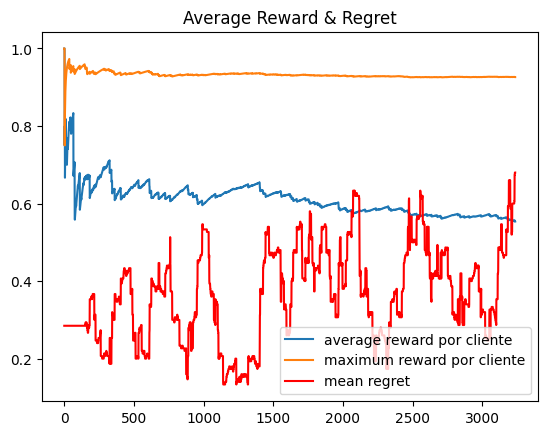

In [ ]:
show_records_avgs(records)

Hemos podido comprobar que el modelo se mantiene consistente con un "average reward" de entorno a algo más de 0.5 para el grupo de test como el de control.

### **Tarea 6:** Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

In [ ]:
np.round(modelo_lineal.mu, 3)

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.012, -0.593,  0.   ,  0.   , -0.01 , -1.085, -0.039,
        -1.244, -0.008,  0.204]])

Vemos que el modelo aprende que el reward de "no dar crédito" es siempre 0, independientemente del contexto. Sin embargo, para la acción "dar crédito" el modelo trata de aproximar un reward negativo para los casos en los que el impago es más probable.

In [ ]:
for i,alpha in enumerate(np.round(modelo_lineal.mu[1],3)):
  if i<10:
    print(alpha,'      ', df.columns[i+1])
  else:
    print(alpha)

0.0        RevolvingUtilizationOfUnsecuredLines
0.012        age
-0.593        NumberOfTime30-59DaysPastDueNotWorse
0.0        DebtRatio
0.0        MonthlyIncome
-0.01        NumberOfOpenCreditLinesAndLoans
-1.085        NumberOfTimes90DaysLate
-0.039        NumberRealEstateLoansOrLines
-1.244        NumberOfTime60-89DaysPastDueNotWorse
-0.008        NumberOfDependents
0.204


Las variables se pueden agrupar conceptualmente de la siguiente manera:

* **Término independiente**: es positivo (0.204), lo que nos indica que el agente sabe que sin información de contexto, lo mejor es dar el crédito.

* **Cantidad de días de retraso**: aquí entran las siguientes variables (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate y NumberOfTime60-89DaysPastDueNotWorse). Todas ellas con un coeficiente negativo significativo, lo que significa que el agente aprende que si el cliente ha tenido retrasos en pagos anteriores, no es recomendable darle el crédito.

  Llama la atención que los retrasos de más de 90 días tengan un coeficiente menor (en valor absoluto) con respecto a los retrasos de entre 60 y 89 días.

* **Cantidad de créditos**: aquí entran las siguiente variables (NumberRealEstateLoansOrLines, NumberOfOpenCreditLinesAndLoans). Ambas de cofeiciente negativo, es probable que este aprendiendo que un cliente con demasiadas lineas de crédito abiertas y demasiados préstamos puede tener problemas a la hora de pagar un crédito más.

+ **Edad**: la característica **age** esta ponderada positivamente indicando que el agente cree que los clientes seniors tienen más probablidad de pagar el crédito.

### **Tarea 7:** Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?



Intuitivamente, dado que la penalización por un crédito no pagado es mucho menor, el agente tenderá a dar más créditos.

**Caso 1: penalización constante -1 por crédito impagado**

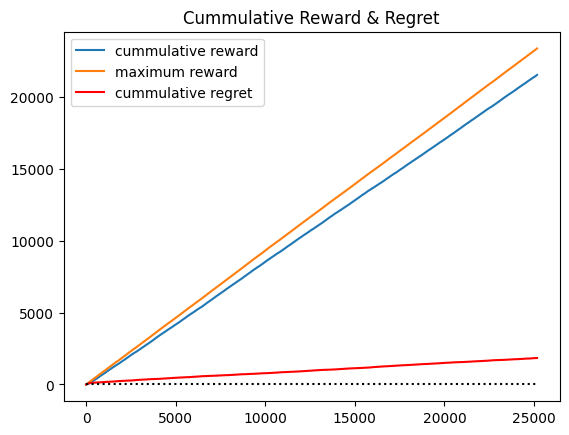

Total reward      : 21547
Total ideal reward: 23388


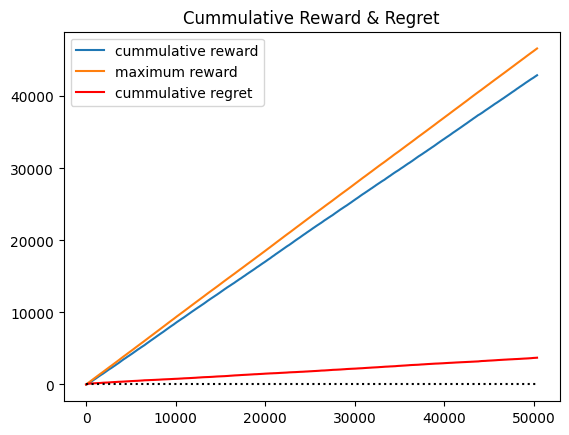

Total reward      : 42922
Total ideal reward: 46638


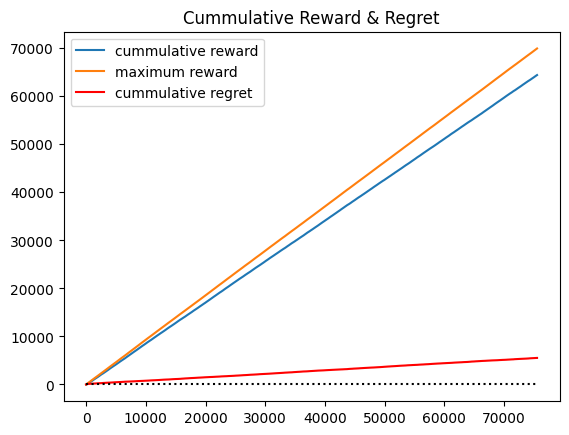

Total reward      : 64417
Total ideal reward: 69948


In [ ]:
modelo_lineal = LinearBandits(n_acciones, n_features,
                              initial_pulls=100)

records = iterate_model(clientes(df_train, penalizacion=-1),modelo_lineal, acciones_ideales,
                        steps=len(df_train), plot_frequency=len(df_train)//3,
                       )

In [ ]:
modelo_lineal.save('trained_modelo_lineal_penalizacion_menos1.pkl')
modelo_lineal = load_model('trained_modelo_lineal_penalizacion_menos1.pkl')

### 7.1 ¿Y si se va haciendo aún más pequeña la penalización?

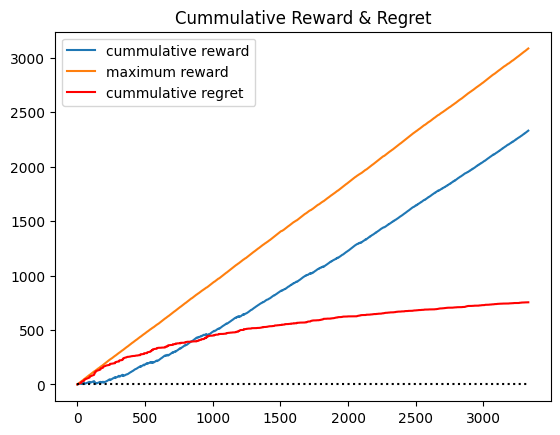

Total reward      : 2331.243646632943
Total ideal reward: 3086


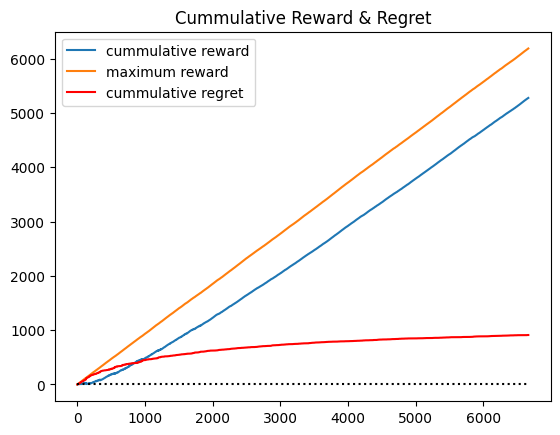

Total reward      : 5274.6265591423435
Total ideal reward: 6185


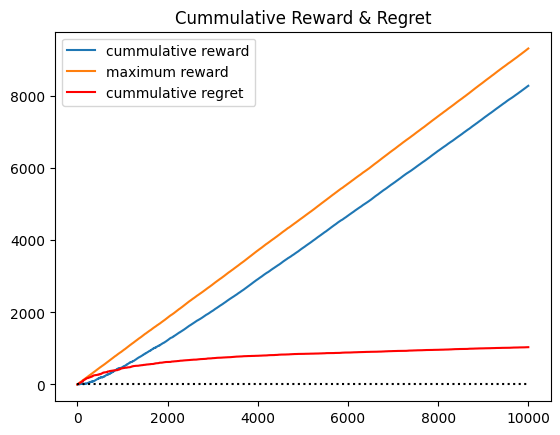

Total reward      : 8287.20629590575
Total ideal reward: 9322


In [ ]:
n_acciones = 2
n_features = df_train.columns.notna().sum()-1

modelo_lineal = LinearBandits(n_acciones, n_features,
                              initial_pulls=100)

acciones_ideales = {
    "Paga": 1, # para el tipo de cliente "paga" lo óptimo es darle el crédito (1)
    "Nopaga": 0  # para el tipo de cliente "no paga" lo óptimo es no darle el crédito (0)
}

records = iterate_model(clientes(df_train[0:10000],penalizacion='disminuye'),modelo_lineal, acciones_ideales,
                        steps=len(df_train[0:10000]), plot_frequency=len(df_train[0:10000])//3)

Average reward      : 0.8288206295905749
Average ideal reward: 0.9323


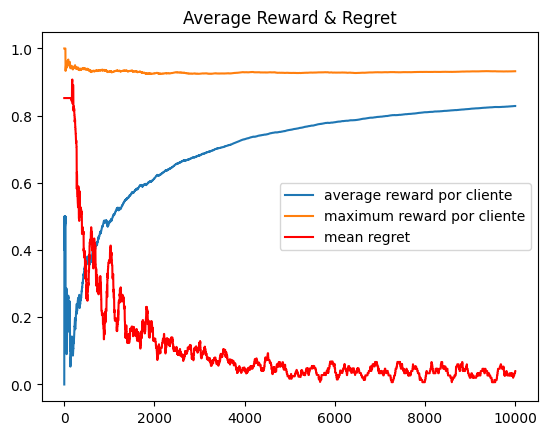

In [ ]:
show_records_avgs(records)

In [ ]:
cl_train = clientes(df_train)

N = 10
print('Expected values para algunos clientes')

for client in range(N):
  cl_train.cliente()
  ev = modelo_lineal.expected_values(cl_train.get_context().values)
  print(ev, cl_train.tipo_cliente())

Expected values para algunos clientes
[0.         0.98165351] ['Paga']
[0.         0.91138452] ['Paga']
[0.        0.9745097] ['Paga']
[0.         0.84899736] ['Paga']
[0.         0.95692138] ['Paga']
[0.         0.92221056] ['Paga']
[0.         0.83986406] ['Paga']
[0.        0.9195774] ['Paga']
[0.         0.94247849] ['Paga']
[0.         0.96928373] ['Paga']


In [ ]:
cl_train = clientes(df_train)

N = 200
print('Expected values para algunos clientes')

for client in range(N):
  cl_train.cliente()
  if cl_train.tipo_cliente()[0]=='Nopaga':
    ev = modelo_lineal.expected_values(cl_train.get_context().values)
    print(ev, cl_train.tipo_cliente())

Expected values para algunos clientes
[0.         0.90565732] ['Nopaga']
[ 0.        -1.6425512] ['Nopaga']
[0.         0.93634044] ['Nopaga']
[0.         0.59006318] ['Nopaga']
[0.         0.93513219] ['Nopaga']
[0.         0.87278915] ['Nopaga']
[0.         0.91647789] ['Nopaga']
[0.         0.90979028] ['Nopaga']
[ 0.         -0.79290764] ['Nopaga']
[ 0.         -6.02542461] ['Nopaga']
[ 0.         -2.52558883] ['Nopaga']
[ 0.         -2.23017171] ['Nopaga']


### **Tarea 8:** Optimiza tu sistema haciendo selección de variables.

Para realizar la selección de variables vamos a utilizar los coeficientes que ha aprendido el modelo lineal. Usaremos los datos que tienen asociados un coeficiente (en valor absoluto) mayor.

In [ ]:
# keep only three most informative columns
df_train = df_train[['NumberOfTime30-59DaysPastDueNotWorse',
                    'NumberOfTimes90DaysLate',
                    'NumberOfTime60-89DaysPastDueNotWorse',
                     'SeriousDlqin2yrs']]

In [ ]:
df_train.head()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,SeriousDlqin2yrs
135262,0,0,0,0
14308,0,0,0,0
124448,0,0,0,0
113232,1,0,0,0
83942,0,0,0,0


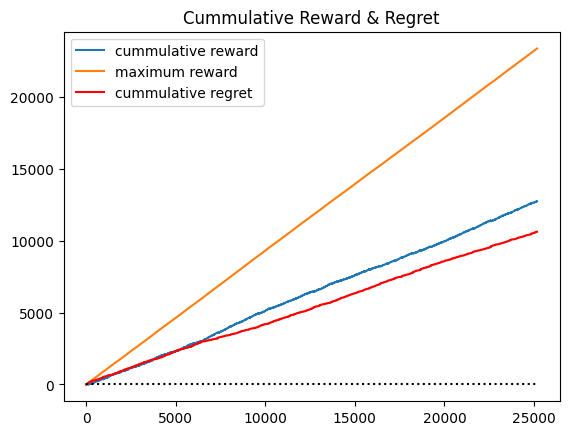

Total reward      : 12756
Total ideal reward: 23388


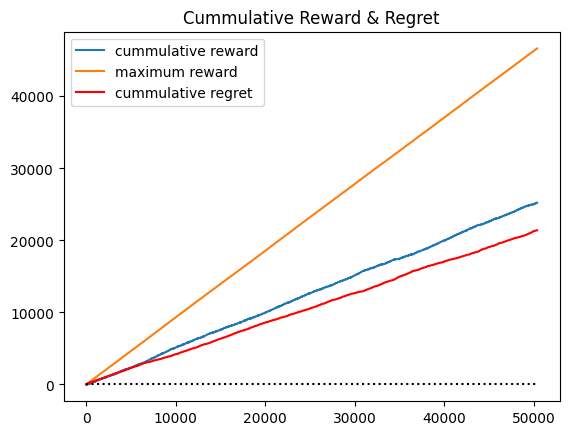

Total reward      : 25234
Total ideal reward: 46638


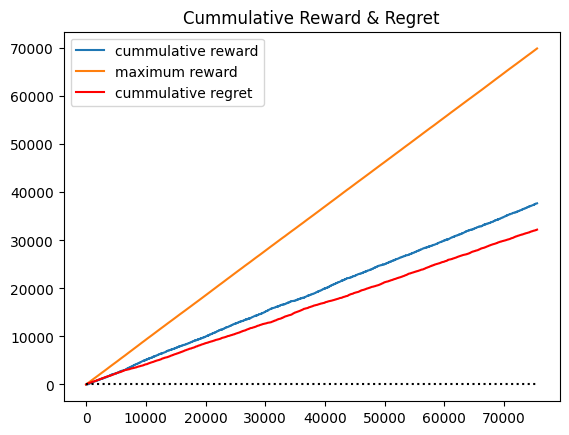

Total reward      : 37710
Total ideal reward: 69948


In [ ]:
n_acciones = 2
n_features = df_train.columns.notna().sum()-1

modelo_lineal = LinearBandits(n_acciones, n_features,
                              initial_pulls=100)

acciones_ideales = {
    "Paga": 1, # para el tipo de cliente "paga" lo óptimo es darle el crédito (1)
    "Nopaga": 0  # para el tipo de cliente "no paga" lo óptimo es no darle el crédito (0)
}

records = iterate_model(clientes(df_train),modelo_lineal, acciones_ideales,
                        steps=len(df_train), plot_frequency=len(df_train)//3)

Average reward      : 0.4993643899467677
Average ideal reward: 0.9262692338250483


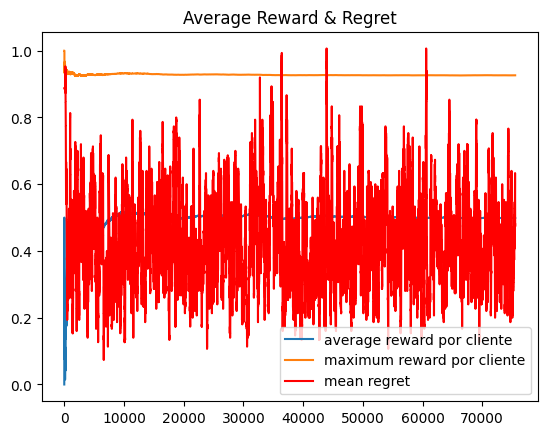

In [ ]:
show_records_avgs(records)

Grupo de test

In [ ]:
modelo_lineal = load_model('optimizado_modelo_lineal.pkl')

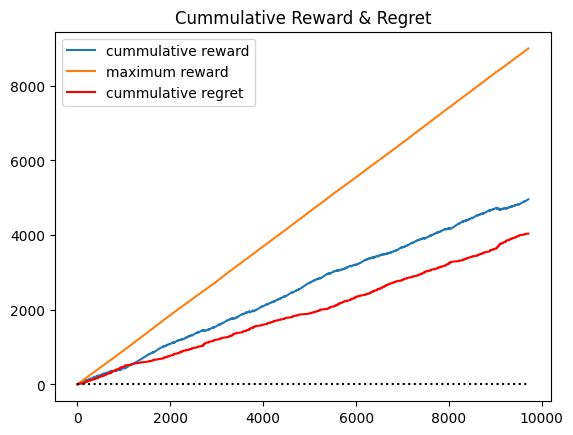

Total reward      : 4959
Total ideal reward: 8999


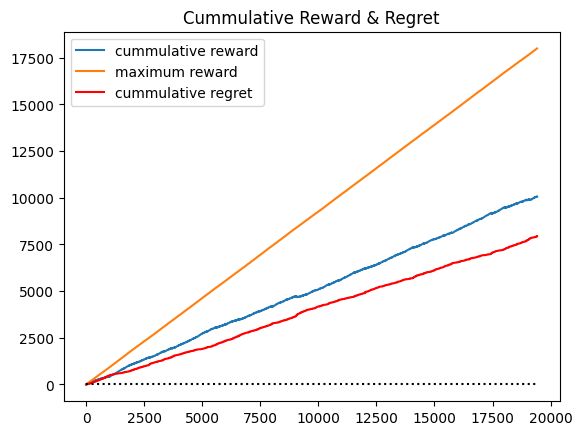

Total reward      : 10052
Total ideal reward: 17997


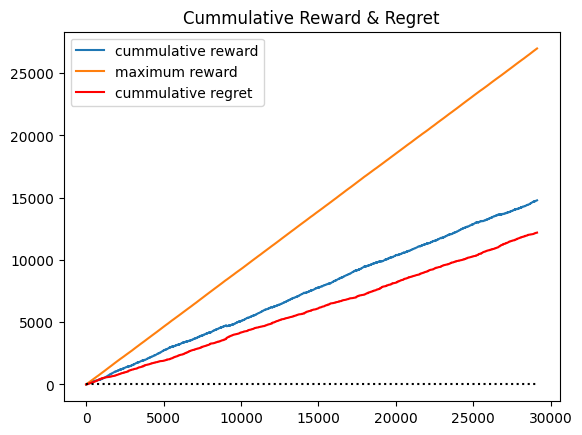

Total reward      : 14787
Total ideal reward: 26981


In [ ]:
df_test = df_test[['NumberOfTime30-59DaysPastDueNotWorse',
                    'NumberOfTimes90DaysLate',
                    'NumberOfTime60-89DaysPastDueNotWorse',
                     'SeriousDlqin2yrs']]
df_control = df_control[['NumberOfTime30-59DaysPastDueNotWorse',
                    'NumberOfTimes90DaysLate',
                    'NumberOfTime60-89DaysPastDueNotWorse',
                     'SeriousDlqin2yrs']]
records = evaluate_model(clientes(df_test),modelo_lineal, acciones_ideales,
                        steps=len(df_test), plot_frequency=len(df_test)//3)

Average reward      : 0.5076558637736885
Average ideal reward: 0.9262908541609448


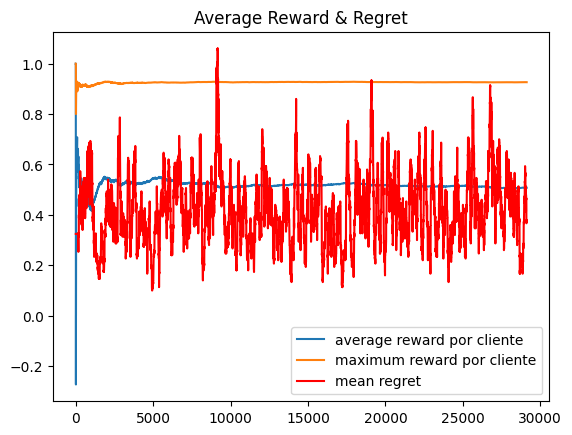

In [ ]:
show_records_avgs(records)

Grupo de control

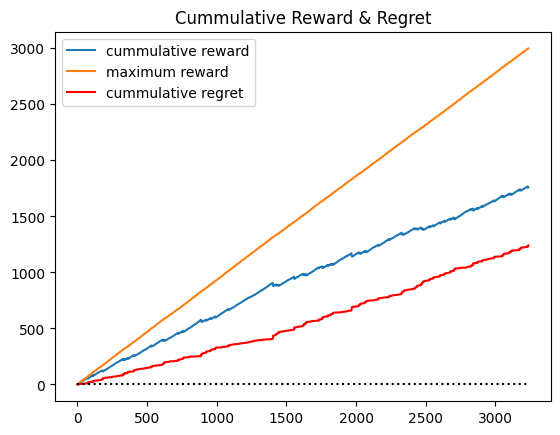

Total reward      : 1758
Total ideal reward: 2998


In [ ]:
records = evaluate_model(clientes(df_control),modelo_lineal, acciones_ideales,
                        steps=len(df_control), plot_frequency=len(df_control))

Average reward      : 0.5430954587581094
Average ideal reward: 0.9261662032746371


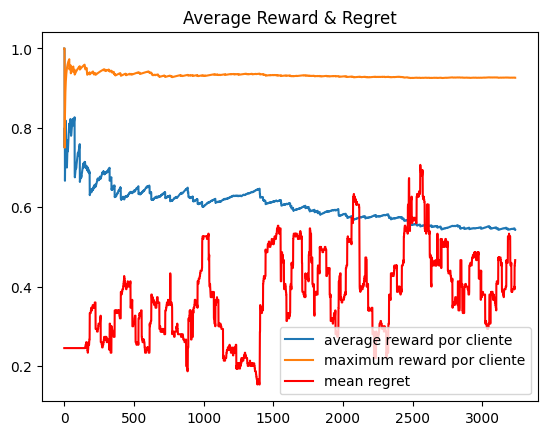

In [ ]:
show_records_avgs(records)

In [ ]:
modelo_lineal.save('optimizado_modelo_lineal.pkl')

Sobre el grupo de control, el modelo lineal con penalización -10 consigue un reward total de: 1792

El modelo optimizado (con menos variables) consigue un reward total de: 1758

Un modelo mucho más simplificado con una performance prácticamente igual.